# Effect of prior in classification for forest cover

## Context 

The purpose of this mini-project is to conduct experiments and study various classification algorithms from supersized machine learning. In this mini-project, 5 main issues will be considered, implemented and described. The main questions are:
1. Uploading the forest cover dataset with using sklearn and further dividing it into a binary classification subset, creating a classification model and fixing its results
2. Do a comparison of different classifiers in terms of accuracy
3. Study the effect of different sizes of the training data set on the final result of the model accuracy
4. Convert the dataset to two dimensions using Principal Component Analsysis and study the impact on the model
5. Explore what happens when the class priors in the training data are different from the class priors in the testing data with different models


#### Data Collection

Import Python Libraries
First import the libraries to be able to call functions that needed for this prject. In this project the most useful libraries are:

In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets

import sklearn.model_selection 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import sklearn.metrics
import sklearn.preprocessing
from sklearn import model_selection

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#### Import all datasets and short characteristics

The dataset from scikit-learn and for it uploading first we need look into keys it has

In [2]:
data = datasets.fetch_covtype()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


Data is downloaded when accessing the link

https://scikit- learn.org/stable/datasets/real_world.html#forest-covertypes

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


Above in the table where the first 5 rows of the dataset is shown, for a more detailed consideration we will use the .info() function

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

When using the .info() function above, the following important information is visible:
- dataset contains 55 columns with forest cover characteristics
- all elements in the dataset are numeric (float, integer) and this is important because there is no need to carry out separate manipulations to transform categorical elements into numeric ones
- there are no nulls and missing values in the dataset, which means you can build models and study this dataset further without first cleaning the data
- dataset contains 581012 forest cover instances

After uploading the dataset and reviewing its details, you can begin to get answers to previously posed questions

### 1.  Create a binary classification subset by only consider type 1 (spruce/fir) and type2 (lodgepole pine). Calculate the classification accuracy of a random forest classifier using the default settings using half the instances for training and half the instances for testing  

Firstly, create a binary classification subset by only consider type 1 (spruce/fir) and type2 (lodgepole pine).

In [5]:
subset = df[df["target"] <= 2]
subset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5,2579.0,132.0,6.0,300.0,-15.0,67.0,230.0,237.0,140.0,6031.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
11,2886.0,151.0,11.0,371.0,26.0,5253.0,234.0,240.0,136.0,4051.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
12,2742.0,134.0,22.0,150.0,69.0,3215.0,248.0,224.0,92.0,6091.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [6]:
subset.shape

(495141, 55)

The original dataset has been significantly reduced and its current size is 495141 forest covers and only two types of target (1,2)

After creating new subset let's calculate the classification accuracy of a random forest classifier using half the instances for training and half the instances for testing

#### Splitting the data into training and test sets

For further training and testing of the future model, you need to divide the data into test and training in advance

In [7]:
df_train, df_test = sklearn.model_selection.train_test_split(subset, test_size = 0.5)
print("df_train:", df_train.shape)
print("df_test:", df_test.shape)

df_train: (247570, 55)
df_test: (247571, 55)


#### Splitting Features and the Target Label¶

When separating Features and the Target Label, we select the "target" column as the target, and the rest of the Features are all, except for the "target" column

In [8]:
x_train = df_train.drop(['target'], axis=1)
y_train = df_train['target']
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

x_test = df_test.drop(['target'], axis=1)
y_test = df_test['target']
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (247570, 54)
y_train: (247570,)
x_test: (247571, 54)
y_test: (247571,)


#### Training a Model

Instantiate and fit the RandomForestClassifier

In [9]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

Make predictions for the test set

In [10]:
y_pred_test = forest.predict(x_test)

View accuracy score

In [11]:
accuracy_score(y_test, y_pred_test)

0.954768531047659

View the classification report for test data and predictions

In [12]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.96      0.93      0.95    106235
           2       0.95      0.97      0.96    141336

    accuracy                           0.95    247571
   macro avg       0.96      0.95      0.95    247571
weighted avg       0.95      0.95      0.95    247571



Based on the results of consideration of the first question of the mini-project, it is possible to draw conclusions about the predictive ability of the model, which solves the problem of classifying forest cover from two types
- the RandomForestClassifier() model was applied
- this model showed a fairly high predictive ability, as evidenced by its accuracy, which is equal to 0.95
- other indicators such as *precision, recall, f1-score* also showed a fairly high result, which indicates the minimum errors that are, in principle, acceptable

### 2. Do a comparison of different classifiers in terms of accuracy for the same data as the previous question -  to calculate the accuaracy for each classifier  

The second step will be a more extensive test of various models and their comparison with each other. We will build the following models:
- LogisticRegression()
- LinearDiscriminantAnalysis()
- DecisionTreeClassifier()
- RandomForestClassifier()
- GaussianNB()

In [13]:
import warnings
warnings.filterwarnings("ignore")

LR: 0.753985 (0.004414)
LDA: 0.774775 (0.001607)
DTC: 0.930763 (0.000822)
RFC: 0.949982 (0.001389)
NB: 0.617559 (0.001950)


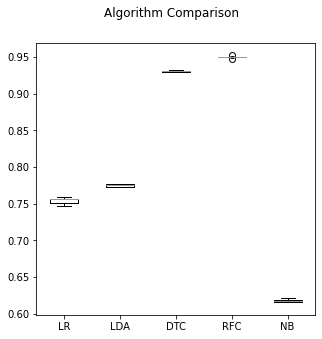

In [14]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold()
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring) 
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(5,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Based on the results of building and comparing several models that solve the problem of classifying forest cover types, one can draw conclusions on and compare which of the models showed the best result, the best accuracy (95%) and the best predictive ability. It is obvious that this model is a RandomForestClassifier because its accuracy is much higher than the accuracy of other models

### 3. Examine the effect of class imbalance on classification using the random forest classifier. To do so resample the training set so that there class proportions for type 1 and type 2 in the training data are: 0.9-0.1, 0.8-0.2, 0.7-0.3, 0.6-0.4 and original (which is close to 0.5-0.5).  

First, let's check the distribution of types in comparison with each other visually

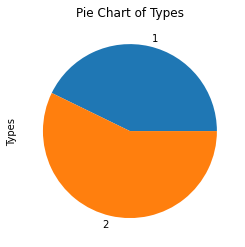

In [15]:
df1 = subset.groupby('target').size()

df1.plot(kind='pie', figsize=(4, 4))
plt.title("Pie Chart of Types")
plt.ylabel("Types")
plt.show()

The pie chart shows that type 2 takes up a little more of the data, i.e. it dominates

Now let's build the same model on the same dataset, but consider different options for the distribution of training data. distribution and size in percentage terms are 50%/50%, 60%/40%, 70%/30%, 80%/20%, 90%/10%. And consider the influence of the size of the training dataset size on the final result - namely, what size will give the most accurate model and solve the classification problem

In [16]:
result_df = pd.DataFrame(columns=["Size", "test_accuracy"])
data_size = [0.5, 0.6, 0.7, 0.8, 0.9]
for i in data_size:
    
    df_train, df_test = sklearn.model_selection.train_test_split(subset, test_size = i)
    
    x_train = df_train.drop(['target'], axis=1)
    y_train = df_train['target']

    x_test = df_test.drop(['target'], axis=1)
    y_test = df_test['target']
    
    model_size = RandomForestClassifier()
    model_size.fit(x_train, y_train)
    
    y_predicted = model_size.predict(x_train)
    
    y_predicted = model_size.predict(x_test)
    test_accuracy = sklearn.metrics.accuracy_score (y_test, y_predicted) 
    
    result_df = result_df.append({"Size": i, 
                                  "test_accuracy": test_accuracy}, ignore_index=True)
    
result_df

,Size,test_accuracy
0,0.5,0.955128
1,0.6,0.950644
2,0.7,0.944085
3,0.8,0.932345
4,0.9,0.908459


According to the results of the iteration, it can be seen that the best and highest accuracy of the model was achieved with the ratio 50%/50%

### 4. Convert the dataset to two dimensions using Principal Component Analsysis. Repeat the analysis of question 2 using the best performing classifier trained using the different imbalanced datasets from the previous question and now that the data is 2D 

To convert the dataset to two-dimensional space, use the function sklearn.decomposition.PCA with setting n_components equal to 2

In [19]:
result_df = pd.DataFrame(columns=["Size", "test_accuracy"])
data_size = [0.5, 0.6, 0.7, 0.8, 0.9]
for i in data_size:
    
    df_train_PCA, df_test_PCA = sklearn.model_selection.train_test_split(subset, test_size = i)
    
    x_train = df_train_PCA.drop(['target'], axis=1)
    y_train = df_train_PCA['target']
    
    x_test = df_test_PCA.drop(['target'], axis=1)
    y_test = df_test_PCA['target']
    
    # Building a PCA model
    pca = sklearn.decomposition.PCA(n_components=2)
    pca.fit(x_train)

    # Reducing the number of training features
    x_train_reduced = pca.transform(x_train)
    
    # Reducing the number of test features
    x_test_reduced = pca.transform(x_test)
    
    # Building a RandomForestClassifier model
    model_size = RandomForestClassifier()
    model_size.fit(x_train_reduced, y_train)
    
    y_predicted = model_size.predict(x_test_reduced)
    test_accuracy = sklearn.metrics.accuracy_score (y_test, y_predicted)
    
    result_df = result_df.append({"Size": i, 
                                  "test_accuracy": test_accuracy}, ignore_index=True)
    
result_df

,Size,test_accuracy
0,0.5,0.596180
1,0.6,0.597755
2,0.7,0.599229
3,0.8,0.601901
4,0.9,0.604719


As a result of iteration, including the use of different sizes of test and training datasets, we got the accuracy of the model equal to less than 60%. This is less than with multidimensional space and this is logical. The Principal Component Analysis feature automatically stores the most relevant and most closely related spaces that affect the target variable as the number of spaces decreases. with such a significant decrease in features, it is obvious that there is not enough data for the model and it loses quality. Thus, the accuracy of the model has decreased.

### 5.  For this question the goal is to explore what happens when the class priors in the training data are different from the class priors in the testing data. Consider the same class propoportions for training as in question 3 as well as well as using them for the test set. There will be a total of 5(train) by 5 (test) = 25 configurations. For each configuration run all the classifiers from question 2. Comment on the results and try to identify the best classifier in terms of robustness to mismatch of class priors between training and testing. 

The last task uses the widest range of functions, where almost all previous tasks are combined, while the number of iterations has increased to 25.

In [20]:
test_size = [0.5, 0.6, 0.7, 0.8, 0.9]
for j in test_size:
    
    df_train_5, df_test_5 = sklearn.model_selection.train_test_split(subset, test_size = j)
    
    x_train_5 = df_train_5.drop(['target'], axis=1)
    y_train_5 = df_train_5['target']

    x_test_5 = df_test_5.drop(['target'], axis=1)
    y_test_5 = df_test_5['target']

    # prepare configuration for cross validation test harness
    seed = 7
    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))  
    models.append(('LDA', LinearDiscriminantAnalysis()))  
    models.append(('DTS', DecisionTreeClassifier()))  
    models.append(('RFC', RandomForestClassifier()))  
    models.append(('NB', GaussianNB()))   
    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = model_selection.KFold()
        cv_results = model_selection.cross_val_score(model, x_train_5, y_train_5, cv=kfold, scoring=scoring) 
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(j, msg)
        

0.5 LR: 0.750870 (0.005587)
0.5 LDA: 0.775308 (0.000774)
0.5 DTS: 0.930860 (0.001448)
0.5 RFC: 0.950374 (0.000495)
0.5 NB: 0.617013 (0.002309)
0.6 LR: 0.753539 (0.004933)
0.6 LDA: 0.775255 (0.002131)
0.6 DTS: 0.922204 (0.001001)
0.6 RFC: 0.945263 (0.001021)
0.6 NB: 0.619471 (0.002708)
0.7 LR: 0.753255 (0.007287)
0.7 LDA: 0.774077 (0.001919)
0.7 DTS: 0.912341 (0.001872)
0.7 RFC: 0.937216 (0.001285)
0.7 NB: 0.621797 (0.003864)
0.8 LR: 0.752424 (0.002239)
0.8 LDA: 0.771489 (0.002905)
0.8 DTS: 0.893576 (0.001510)
0.8 RFC: 0.925092 (0.001625)
0.8 NB: 0.615583 (0.003048)
0.9 LR: 0.749485 (0.006485)
0.9 LDA: 0.773418 (0.004994)
0.9 DTS: 0.860666 (0.003108)
0.9 RFC: 0.902856 (0.002524)
0.9 NB: 0.615260 (0.007494)


The result of this iteration showed the following outcome for the best model that solves the two-type forest cover classification problem:
- RandomForestClassifier() model
- Accuracy 95%
- Distribution of training and test datasets 50%/50%
As a result, the observations show that we returned to the result that was achieved during iterations in the first question of this mini-project. In the first question, the same components were also given and, as a result, we got the same result.